# MNIST - Handwritten digit identification using keras
### Ref: https://github.com/Group13MI2022/cnn-digit-classifier.git

In [ ]:
#program classify handwritten digits to 0 - 9 using CNN

Sequential model help us to build the archetecture for neural network.It is a linear stack of layers.Dense, Conv2D,Flatten help us to create layers for our model. mnist is the dataset that contain images of handwritten digits which we are using in this project,to_categorical is used to convert array of labelled data to one hot vector. matplotlib is used to draw plot of accuracy and to show pictures.

In [ ]:
#import the libraries
from keras.models import Sequential#helps to build the archetecture for neural network
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


Here we split data into training set and testing set. x_train contain training images and y_train contain training labels.x_test and y_test are testing dataset, x_test contain images for testing and y_test contain lebels to test on.

In [ ]:
#load data into training set and test set
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


for x_train we get 60000 rows on 28x28 size image and for x_test we get 10000 rows of 28x28 size images.

In [ ]:
#Get image shape
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#first image as array
x_train[1]#displays image as arrays of its pixel value ranging from 0-253

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[1]#Get image label

0

Here we use matplotlib to display the image.

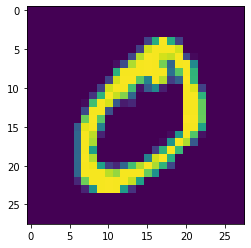

In [ ]:
#Display image
plt.imshow(x_train[1])

Here we reshape the images belonging to train and testing dataset to 28x28 dimension and they are converted to grayscale.

In [ ]:
#Reshape the data to fit the model
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

Here we are processing labels of images, for that we are perform one-hot encoding using to_categorical. Labels will be processed into a binary vector, The magnitude of digit will be shown by index value of 1 in a one dimensional list. When we print element at index 1 of y_train dataset which is '0' after one-hot encoding we get a list with '1' at zeroth index and rest will be zeros.

In [ ]:
#one hot encoding
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)
print(y_train_one_hot[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Here we are creating the CNN model. We use sequential for building the archetecture of our model. Next, we add layers to our model. Conv2D is a convolution layer to extract features from input layer.This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.64 is given as number of kernals, kernal_size is given as 3, so it will be a 3x3 kernal. Activation function is 'relu' (rectified linear activation function) it is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero, input_shabe will be given as the size of image we are giving (28x28x1).
After that create one more Conv2D layer with number of kernals 32 and kernal_size 3 with 'relu' as activation function.Then add a flatten layer, its going to convert images to one dimensional array. Our last layer will be a dense layer,dense layer is a neural network layer that is connected deeply, which means each neuron in the dense layer receives input from all neurons of its previous layer. This layer contain 10 neurons representing 10 digits (0-9), activation function used in this layer is 'softmax', it is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution

In [ ]:
#Build CNN model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))



Here we are compiling our model using model.compile(), It takes three parameters. Optimizer is 'adam', Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data. Categorical crossentropy is given as loss function, it is used if number of classes are greater than 2, in our case we got 10 classes. Matrics is givn to check accuracy.

In [ ]:
#compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Here we are training our model, First we create a variable called 'hist'. As parameters we give dataset x_train and y_train_one_hot which contain processed image and labels respectively. The test dataset is given as validation data. Number of epochs is given as 3,The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
Once training is complete we have 98.69% accuracy on training data and 97.80% accuracy on validation dataset.

In [ ]:
#Train the model
hist=model.fit(x_train,y_train_one_hot, validation_data=(x_test,y_test_one_hot),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 169s 90ms/step - loss: 0.6603 - accuracy: 0.9129 - val_loss: 0.1069 - val_accuracy: 0.9669
Epoch 2/3
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0706 - accuracy: 0.9786 - val_loss: 0.0844 - val_accuracy: 0.9749
Epoch 3/3
1875/1875 [==============================] - 173s 92ms/step - loss: 0.0391 - accuracy: 0.9876 - val_loss: 0.0872 - val_accuracy: 0.9746


Here we use matplotlib to visualize accuracy rate of our model. The orange line represent accuracy rate on validation data and blue line represent training dataset. With x axis showing epoch. 

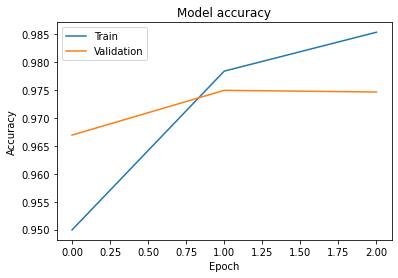

In [ ]:
#visualize model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In this cell we are predicting the digits using our model. We are predicting images from index 4 to 9, using model.predict(). Output will be an array, containing 5 list inside, representing five digits we are predicting.Each list contain 10 elements, each element represent probability of occurance of 10 digits (0-9). The index with highest probability represent the value of digit.
But the output will be in probabilities, which is really hard to understand.

In [ ]:
#show predictions as probabilities for 5 image from index 4 to 9
predictions=model.predict(x_test[4:9])
predictions

array([[9.3212226e-12, 4.7043689e-13, 1.4213879e-10, 7.0468930e-12,
        1.0000000e+00, 7.4763600e-14, 3.7360346e-13, 4.3132616e-12,
        8.7702554e-11, 4.0455639e-08],
       [8.9314750e-11, 9.9997377e-01, 9.7662485e-07, 1.0545269e-10,
        5.7673393e-08, 3.1167488e-10, 1.3782990e-09, 2.2020567e-06,
        2.3048930e-05, 2.3206077e-09],
       [2.3607184e-11, 6.7153742e-06, 8.3259621e-10, 2.3825475e-12,
        9.9999130e-01, 3.4872659e-07, 2.3555748e-13, 2.3629067e-08,
        8.2382246e-07, 8.0292102e-07],
       [1.0361715e-09, 7.5704182e-10, 2.2442232e-06, 5.5496393e-08,
        4.1998687e-04, 3.5553261e-05, 3.3020125e-11, 4.7339562e-08,
        2.7640442e-07, 9.9954188e-01],
       [1.9840860e-07, 2.7189572e-11, 3.9364481e-09, 2.2824594e-10,
        7.6076638e-11, 1.1808869e-01, 8.8179553e-01, 3.3489417e-13,
        1.1559102e-04, 1.6696298e-08]], dtype=float32)

To understand the output easily we are converting the array of probabilities to the label value, It is done by finding maximum value of probability in each list and then converting them into corresponding value of element.

In [ ]:
#print prediction as number labels for first 5 images
print('The predicted digits from images',np.argmax(predictions,axis=1))
#print actual labels
print('Actual labels of images from test dataset',y_test[4:9])

The predicted digits from images [4 1 4 9 6]
Actual labels of images from test dataset [4 1 4 9 5]


Here the predicted values of digit from image is same as labelled value of image.

Real Test

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array

In [ ]:
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
img = Image.open("test_4_inv_28x28.jpg")
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28 ))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY) #(28, 28)
image = cv2.bitwise_not(gray_scale)

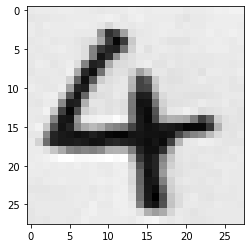

In [ ]:
plt.imshow(image, cmap=plt.get_cmap('gray'))
print(image)

In [ ]:
image = image / 255
image = image.reshape(-1, 28,28,1)
predictions = model.predict(image)
print('The predicted digit from images',np.argmax(predictions,axis=1))

The predicted digit from images [4]
